## Observations and Insights

## Dependencies and starter code

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data=mouse_metadata.merge(study_results, on="Mouse ID", how="outer")


## Summary statistics

In [98]:
#Looking into mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [99]:
#Looking into study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [100]:
#Looking into merged dataset
combined_data=round(combined_data,2)

combined_data=pd.DataFrame(combined_data)
combined_data=combined_data.rename(columns={"Tumor Volume (mm3)":"Volume"})
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [101]:
#Generate a summary statistics table of mean, median, variance, 
#standard deviation, 
#and SEM of the tumor volume for each regimen
#summary_table=combined_data[["Drug Regimen","Tumor Volume (mm3)"]].groupby('Drug Regimen').agg(
 #   {"Tumor Volume (mm3)":[np.mean,np.median,np.var,np.std,st.sem]}).reset_index()

df=pd.DataFrame({"Mean":combined_data.groupby("Drug Regimen")["Volume"].agg(np.mean),
"Median":combined_data.groupby("Drug Regimen")["Volume"].agg(np.median),
"Var":combined_data.groupby("Drug Regimen")["Volume"].agg(np.var),
"Std":combined_data.groupby("Drug Regimen")["Volume"].agg(np.std),
"SEM":combined_data.groupby("Drug Regimen")["Volume"].agg(st.sem)})
df

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675652,41.555,24.946279,4.994625,0.329336
Ceftamin,52.591011,51.775,39.288197,6.268030,0.469809
Infubinol,52.884663,51.820,43.130778,6.567403,0.492248
Ketapril,55.235745,53.700,68.555078,8.279799,0.603866
Naftisol,54.331720,52.505,66.173728,8.134724,0.596467
Placebo,54.033591,52.290,61.166371,7.820893,0.581322
Propriva,52.322484,50.850,42.349673,6.507663,0.512876
Ramicane,40.216974,40.675,23.487770,4.846418,0.320962
Stelasyn,54.233039,52.430,59.450545,7.710418,0.573111


## Bar plots

In [102]:
df=df.reset_index()

Text(0.5, 1.0, 'Data points for Drug Regimen')

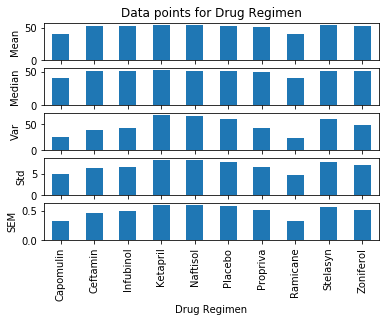

In [171]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
df1=df[["Drug Regimen","Mean"]]
df2=df[["Drug Regimen","Median"]]
df3=df[["Drug Regimen","Var"]]
df4=df[["Drug Regimen","Std"]]
df5=df[["Drug Regimen","SEM"]]
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,sharex=True)
df1.plot(kind='bar',ax=ax1, legend=False)
df2.plot(kind='bar',ax=ax2, legend=False)
df3.plot(kind='bar',ax=ax3, legend=False)
df4.plot(kind='bar',ax=ax4, legend=False)
df5.plot(kind='bar',ax=ax5, legend=False)

#ax1.legend(loc='upper left', frameon=False)
ax5.set_xticklabels(df["Drug Regimen"])

ax5.set_xlabel("Drug Regimen")

ax1.set_ylabel("Mean")
ax2.set_ylabel("Median")
ax3.set_ylabel("Var")
ax4.set_ylabel("Std")
ax5.set_ylabel("SEM")

ax1.set_title("Data points for Drug Regimen")

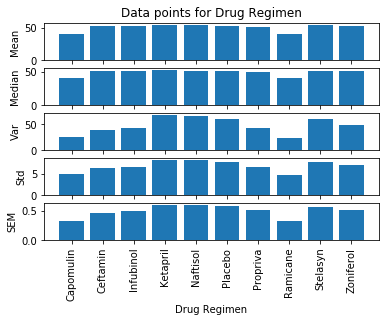

In [140]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_value=df["Drug Regimen"]
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,sharex=True)
ax1.bar(x_value,df["Mean"])
ax2.bar(x_value,df["Median"])
ax3.bar(x_value,df["Var"])
ax4.bar(x_value,df["Std"])
ax5.bar(x_value,df["SEM"])
plt.xticks(x_value,rotation=90)
ax5.set_xlabel("Drug Regimen")
ax1.set_ylabel("Mean")
ax2.set_ylabel("Median")
ax3.set_ylabel("Var")
ax4.set_ylabel("Std")
ax5.set_ylabel("SEM")
ax1.set_title("Data points for Drug Regimen")
plt.show()

## Pie plots

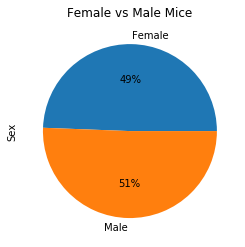

In [128]:
# Generate a pie plot showing the distribution of female versus male 
#mice using pandas
data=combined_data.groupby("Sex").Sex.count()
labels=data.keys()
data.plot(kind="pie", labels=labels,autopct="%1.0f%%", title="Female vs Male Mice")


Text(0.5, 1.0, 'Female vs Male Mice')

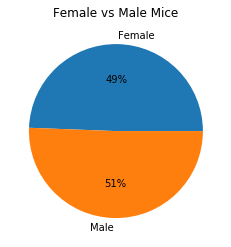

In [126]:
# Generate a pie plot showing the distribution of female versus male 
#mice using pyplot
data=combined_data.groupby("Sex").Sex.count()
labels=data.keys()
plt.pie(data,labels=labels,autopct="%1.0f%%")
plt.title("Female vs Male Mice")

## Quartiles, outliers and boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the 
#most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
df_boxplot=combined_data[["Drug Regimen","Volume"]].loc[(combined_data["Drug Regimen"]=="Capomulin")| 
                                                                     (combined_data["Drug Regimen"]=="Ramicane")| 
                                                                     (combined_data["Drug Regimen"]=="Infubinol")| 
                                                                     (combined_data["Drug Regimen"]=="Ceftamin")]
quantile_100=df_boxplot.groupby("Drug Regimen").quantile(0.1)
quantile_25=df_boxplot.groupby("Drug Regimen").quantile(0.25)
quantile_75=df_boxplot.groupby("Drug Regimen").quantile(0.75)
quantile_50=df_boxplot.groupby("Drug Regimen").quantile(0.50)

max_vol=df_boxplot.groupby("Drug Regimen").max()
min_vol=df_boxplot.groupby("Drug Regimen").min()

lowerq=quantile_25
upperq=quantile_75
iqr=upperq-lowerq

lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f"The lower quartile is:{lowerq}\n")
print(f"The upper quartile is: {upperq}\n")
print(f"The interquartile range is: {iqr}\n")
print(f"The median is: {quantile_50}\n ")
print(f"The lower bound is: {lower_bound}\n ")
print(f"The upper bound is: {upper_bound}\n\n ")

#outlier check
check=(min_vol-lower_bound).sum()+(max_vol-upper_bound).sum()
if check[0]!=0:
    print("THERE ARE OUTLIERS!")


The lower quartile is:               Volume
Drug Regimen         
Capomulin     37.6850
Ceftamin      47.2100
Infubinol     47.3125
Ramicane      36.6725

The upper quartile is:               Volume
Drug Regimen        
Capomulin     45.000
Ceftamin      56.800
Infubinol     57.315
Ramicane      45.000

The interquartile range is:                Volume
Drug Regimen         
Capomulin      7.3150
Ceftamin       9.5900
Infubinol     10.0025
Ramicane       8.3275

The median is:               Volume
Drug Regimen        
Capomulin     41.555
Ceftamin      51.775
Infubinol     51.820
Ramicane      40.675
 
The lower bound is:                 Volume
Drug Regimen          
Capomulin     26.71250
Ceftamin      32.82500
Infubinol     32.30875
Ramicane      24.18125
 
The upper bound is:                 Volume
Drug Regimen          
Capomulin     55.97250
Ceftamin      71.18500
Infubinol     72.31875
Ramicane      57.49125

 
THERE ARE OUTLIERS!


Text(0.5, 1.0, 'Drug Regimen vs Tumor Volume')

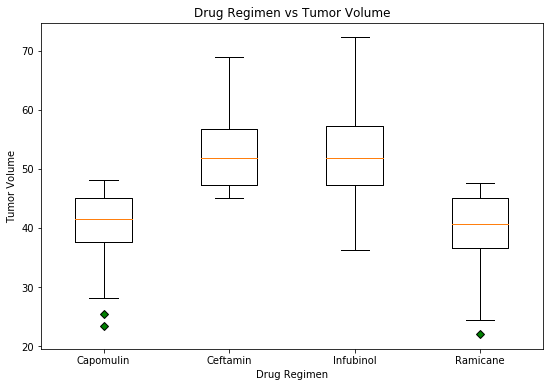

In [208]:
# green_diamond = dict(markerfacecolor='g', marker='D')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

collectn_1=df_boxplot["Volume"].loc[(combined_data["Drug Regimen"]=="Capomulin")]
collectn_2=df_boxplot["Volume"].loc[(combined_data["Drug Regimen"]=="Ceftamin")]
collectn_3=df_boxplot["Volume"].loc[(combined_data["Drug Regimen"]=="Infubinol")]
collectn_4=df_boxplot["Volume"].loc[(combined_data["Drug Regimen"]=="Ramicane")]

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, flierprops=green_diamond)

## Custom x-axis labels
ax.set_xticklabels(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume")
ax.set_title("Drug Regimen vs Tumor Volume")



## Line and scatter plots

In [22]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


Text(0.5, 1.0, 'Time Point vs Tumor Volume')

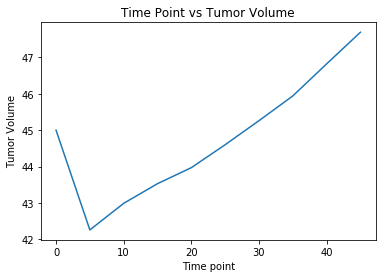

In [92]:
# Generate a line plot of time point versus tumor volume for a mouse 
#treated with Capomulin

mouse="i557"
time_vs_tumor=combined_data[["Timepoint","Volume"]].loc[(combined_data["Drug Regimen"]=="Capomulin") & 
    (combined_data["Mouse ID"]==mouse)]
plt.plot(time_vs_tumor["Timepoint"],time_vs_tumor["Volume"])
plt.xlabel('Time point')
plt.ylabel('Tumor Volume')
plt.title('Time Point vs Tumor Volume')


Text(0.5, 1.0, 'Mouse Weight vs Avg Tumor Volume')

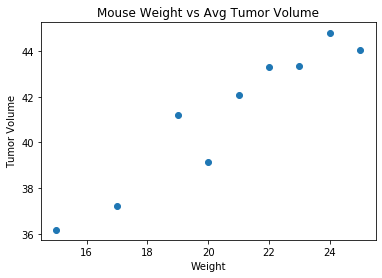

In [89]:
# Generate a scatter plot of mouse weight versus average tumor volume 
#for the Capomulin regimen

weight_vs_avgtumor=combined_data[["Weight (g)","Volume"]].loc[
    (combined_data["Drug Regimen"]=="Capomulin")]
weight_vs_avgtumor=weight_vs_avgtumor.groupby("Weight (g)").Volume.mean()
weight_vs_avgtumor=pd.DataFrame(weight_vs_avgtumor).reset_index()

x=weight_vs_avgtumor.iloc[:,0]
y=weight_vs_avgtumor.iloc[:,1]

plt.scatter(x,y)

plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title('Mouse Weight vs Avg Tumor Volume')

Text(0.5, 1.0, 'Mouse Weight vs Avg Tumor Volume')

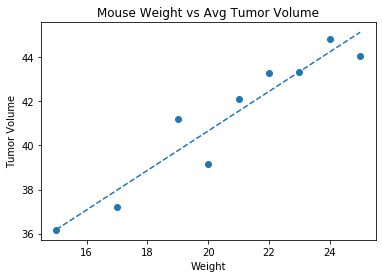

In [90]:
# Calculate the correlation coefficient and linear regression model for 
#mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression 
(slope,a_int,r,p,std_err)=st.linregress(x,y)

# Create equation of line
fit=slope*x+a_int

# Plot the linear model on top of scatter plot 

plt.scatter(x,y)
plt.plot(x,fit,"--")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title('Mouse Weight vs Avg Tumor Volume')